# TESLA 

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Reading Data

In [2]:
tsla = pd.read_csv('TSLA_Quarterly_Report.csv')
tsla

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-07-01,15.347333,17.738001,14.066667,16.058001,16.058001,7033539000
1,2019-10-01,16.100000,29.020666,14.952000,27.888666,27.888666,8892501000
2,2020-01-01,28.299999,64.599335,23.367332,34.933334,34.933334,19511104500
3,2020-04-01,33.599998,72.512665,29.760000,71.987335,71.987335,13649307000
4,2020-07-01,72.199997,167.496674,72.033333,143.003326,143.003326,15560492100
5,2020-10-01,146.919998,239.573334,126.370003,235.223328,235.223328,8437833600
6,2021-01-01,239.820007,300.133331,179.830002,222.643326,222.643326,6513015300
7,2021-04-01,229.456665,260.263336,182.326660,226.566666,226.566666,5470912200
8,2021-07-01,227.973328,266.333344,206.820007,258.493347,258.493347,3659838000
9,2021-10-01,259.466675,414.496674,254.529999,352.260010,352.260010,5064306000


In [3]:
# Create a DataFrame
df = pd.DataFrame(tsla)

# Change the date to quarters
df['Date'] = pd.to_datetime(df['Date'])
df['Quarter'] = df['Date'].dt.to_period('Q')
df_quarterly = df.groupby('Quarter').sum().reset_index()

## Plotting Data

Text(0.5, 1.0, "Quarterly Analysis of Tesla's Stock Prices (2019-2024)")

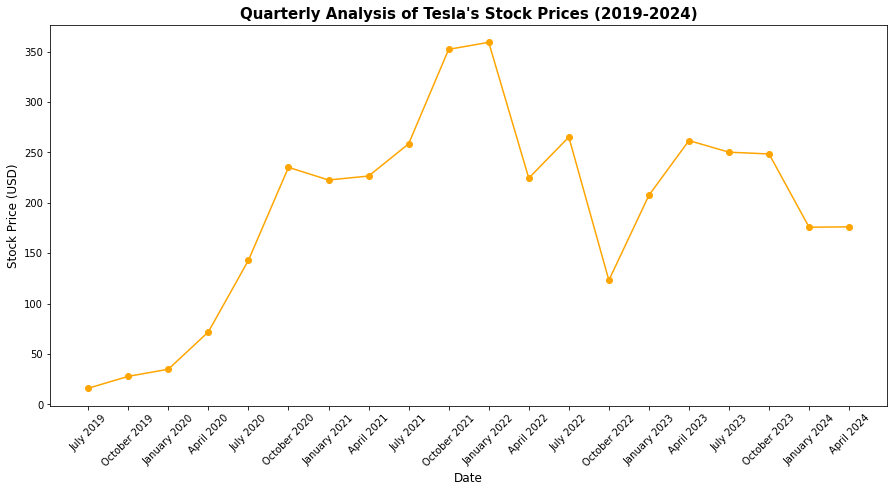

In [4]:
# Creating custom x-axis labels
df_quarterly['Year'] = df_quarterly['Quarter'].dt.year
df['MonthYear'] = df['Date'].dt.strftime('%B %Y')
#df_quarterly['Q'] = df_quarterly['Quarter'].dt.quarter
'''
# Display year starting Q1
year_starts = df_quarterly['Year'].diff().fillna(1).astype(bool)
labels = np.where(year_starts, df_quarterly['Year'].astype(str) + ' Q' + df_quarterly['Q'].astype(str), 'Q' + df_quarterly['Q'].astype(str))
'''
# Plot the figure
plt.figure(figsize=(15, 7))
plt.plot(df['MonthYear'], df['Close'], color='orange', marker = 'o')
#plt.plot(df_quarterly['Quarter'].astype(str), df_quarterly['Close'], marker='o')

# Label fonts
label_font = {'weight': 'normal', 'size': 12}
title_font = {'weight': 'bold', 'size': 15}

# Label names
#plt.xticks(ticks=range(len(labels)), labels=labels, rotation=30)
plt.xticks(rotation=45)
plt.xlabel('Date', fontdict= label_font)
plt.ylabel('Stock Price (USD)', fontdict= label_font)
plt.title('Quarterly Analysis of Tesla\'s Stock Prices (2019-2024)', fontdict=title_font)
